In [2]:
import boto3

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sagemaker import get_execution_role

role = get_execution_role()

s3 = boto3.client("s3")
resource = boto3.resource("s3")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [4]:
gdp_food_household_merge = pd.read_csv("gdp_food_household_merge_v2.csv")
gdp_food_household_merge

,Rank,County,GDP in 0KSh. millions/=,GDP in US dollar millions (PPP),Former province,Area (km2),Population (2019 Census),Capital,admin2,category,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,1.0,nairobi,1492323.0,27798.0,Nairobi,694.9,4397073.0,Nairobi,Nairobi,cereals and tubers,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,2.0,nakuru,517462.0,10333.0,Rift Valley,7509.5,2162202.0,Nakuru[8][9],Nakuru,cereals and tubers,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,3.0,kiambu,421918.0,8425.0,Central,2449.2,2417735.0,Kiambu,NaN,NaN,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,4.0,mombasa,332122.0,6632.0,Coast,212.5,1208333.0,Mombasa,Mombasa,cereals and tubers,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,5.0,nyandarua,245203.0,4896.0,Central,3107.7,638289.0,Ol Kalou,NaN,NaN,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,6.0,machakos,232860.0,4650.0,Eastern,5952.9,1421932.0,Machakos,NaN,NaN,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,7.0,meru,229646.0,4585.0,Eastern,7003.1,1545714.0,Meru,NaN,NaN,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,8.0,kisumu,194489.0,3883.0,Nyanza,2009.5,1155574.0,Kisumu,Kisumu,cereals and tubers,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,9.0,bungoma,183509.0,3664.0,Western,2206.9,1670570.0,Bungoma,NaN,NaN,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,10.0,kakamega,182563.0,3645.0,Western,3033.8,1867579.0,Kakamega,NaN,NaN,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [35]:
len(gdp_food_household_merge)

48

In [5]:
gdp_food_household_merge2 = pd.read_csv("gdp_food_household_merge.csv")
gdp_food_household_merge2

,Rank,County,GDP in 0KSh. millions/=,GDP in US dollar millions (PPP),Former province,Area (km2),Population (2019 Census),Capital,admin2,category,...,total_percent_solar,total_percent_generator,grid_generator_pct,grid_battery_pct,grid_solar_pct,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,1.0,nairobi,1492323.0,27798.0,Nairobi,694.9,4397073.0,Nairobi,Nairobi,cereals and tubers,...,0.089984,0.007018,0.007198,0.012248,0.092293,0.000000,0.000000,0.000000,128.050729,6321.932795
1,2.0,nakuru,517462.0,10333.0,Rift Valley,7509.5,2162202.0,Nakuru[8][9],Nakuru,cereals and tubers,...,0.000000,0.008441,0.010173,0.000000,0.000000,0.000000,0.000000,0.000000,48.542111,4778.924448
2,3.0,kiambu,421918.0,8425.0,Central,2449.2,2417735.0,Kiambu,NaN,NaN,...,0.106712,0.000000,0.000000,0.000000,0.065890,0.000000,0.000000,0.181421,0.783342,3484.666434
3,4.0,mombasa,332122.0,6632.0,Coast,212.5,1208333.0,Mombasa,Mombasa,cereals and tubers,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,5488.553238
4,5.0,nyandarua,245203.0,4896.0,Central,3107.7,638289.0,Ol Kalou,NaN,NaN,...,0.560536,0.000000,0.000000,0.000000,0.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,6.0,machakos,232860.0,4650.0,Eastern,5952.9,1421932.0,Machakos,NaN,NaN,...,0.194563,0.000000,0.000000,0.000000,0.072671,0.000000,0.032444,0.645638,45.031500,3270.198575
6,7.0,meru,229646.0,4585.0,Eastern,7003.1,1545714.0,Meru,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2966.266722
7,8.0,kisumu,194489.0,3883.0,Nyanza,2009.5,1155574.0,Kisumu,Kisumu,cereals and tubers,...,0.399393,0.022562,0.000000,0.000000,0.204136,0.033457,0.078993,0.493684,117.608263,3360.234827
8,9.0,bungoma,183509.0,3664.0,Western,2206.9,1670570.0,Bungoma,NaN,NaN,...,0.315666,0.000000,0.000000,0.000000,0.192905,0.000000,0.068512,0.336268,15.212027,2193.263377
9,10.0,kakamega,182563.0,3645.0,Western,3033.8,1867579.0,Kakamega,NaN,NaN,...,0.279470,0.000000,0.000000,0.000000,0.156060,0.000000,0.075590,0.313628,219.828169,1951.724666


In [6]:
gdp_food_household_merge.columns

Index(['Rank', 'County', 'GDP in 0KSh. millions/=',
       'GDP in US dollar millions (PPP)', 'Former province', 'Area (km2)',
       'Population (2019 Census)', 'Capital', 'admin2', 'category', 'usdprice',
       'county', 'num_households', 'total_inhabitants', 'avg_household_size',
       'avg_household_per_dwelling', 'pct_own_dwelling', 'avg_rooms_occupied',
       'percent_grid_connect', 'percent_any_elect', 'percent_bank_account',
       'percent_mobile_money', 'total_percent_batteries',
       'total_percent_solar', 'total_percent_generator', 'grid_generator_pct',
       'grid_battery_pct', 'grid_solar_pct', 'avg_electricity_use_grid',
       'avg_typical_hours_elect_grid', 'avg_worst_hours_elect_grid',
       'not_grid_generator_pct', 'not_grid_battery_pct', 'not_grid_solar_pct',
       'avg_distance_to_connect', 'GDP percapita in US dollar (PPP)'],
      dtype='object')

In [7]:
gdp_food_household_merge2.columns

Index(['Rank', 'County', 'GDP in 0KSh. millions/=',
       'GDP in US dollar millions (PPP)', 'Former province', 'Area (km2)',
       'Population (2019 Census)', 'Capital', 'admin2', 'category', 'usdprice',
       'county', 'num_households', 'total_inhabitants', 'avg_household_size',
       'avg_household_per_dwelling', 'pct_own_dwelling', 'avg_rooms_occupied',
       'percent_grid_connect', 'percent_bank_account', 'percent_mobile_money',
       'total_percent_batteries', 'total_percent_solar',
       'total_percent_generator', 'grid_generator_pct', 'grid_battery_pct',
       'grid_solar_pct', 'not_grid_generator_pct', 'not_grid_battery_pct',
       'not_grid_solar_pct', 'avg_distance_to_connect',
       'GDP percapita in US dollar (PPP)'],
      dtype='object')

In [8]:
len(gdp_food_household_merge2.columns)

32

In [9]:
len(gdp_food_household_merge.columns)

36

In [10]:
diff_cols = []
for i in gdp_food_household_merge.columns.to_list():
    if i not in gdp_food_household_merge2:
        diff_cols.append(i)

diff_cols

['percent_any_elect',
 'avg_electricity_use_grid',
 'avg_typical_hours_elect_grid',
 'avg_worst_hours_elect_grid']

In [11]:
gdp_food_household_merge["percent_any_elect"].describe()

count    44.000000
mean      0.597029
std       0.172703
min       0.249296
25%       0.465073
50%       0.565909
75%       0.729950
max       0.989288
Name: percent_any_elect, dtype: float64

In [12]:
gdp_food_household_merge["avg_electricity_use_grid"].describe()

count     44.000000
mean      68.628316
std       26.191952
min       29.744379
25%       46.813436
50%       66.173432
75%       86.114160
max      134.350324
Name: avg_electricity_use_grid, dtype: float64

In [13]:
gdp_food_household_merge['avg_typical_hours_elect_grid'].describe()

count    44.000000
mean      4.963285
std       5.011443
min       0.000000
25%       0.000000
50%       4.170516
75%       8.964067
max      15.288914
Name: avg_typical_hours_elect_grid, dtype: float64

In [14]:
gdp_food_household_merge['avg_worst_hours_elect_grid'].describe()

count    44.000000
mean      9.182647
std       4.816001
min       1.029731
25%       5.510607
50%       8.755063
75%      12.198928
max      23.326135
Name: avg_worst_hours_elect_grid, dtype: float64

In [15]:
gdp_food_household_merge.columns

Index(['Rank', 'County', 'GDP in 0KSh. millions/=',
       'GDP in US dollar millions (PPP)', 'Former province', 'Area (km2)',
       'Population (2019 Census)', 'Capital', 'admin2', 'category', 'usdprice',
       'county', 'num_households', 'total_inhabitants', 'avg_household_size',
       'avg_household_per_dwelling', 'pct_own_dwelling', 'avg_rooms_occupied',
       'percent_grid_connect', 'percent_any_elect', 'percent_bank_account',
       'percent_mobile_money', 'total_percent_batteries',
       'total_percent_solar', 'total_percent_generator', 'grid_generator_pct',
       'grid_battery_pct', 'grid_solar_pct', 'avg_electricity_use_grid',
       'avg_typical_hours_elect_grid', 'avg_worst_hours_elect_grid',
       'not_grid_generator_pct', 'not_grid_battery_pct', 'not_grid_solar_pct',
       'avg_distance_to_connect', 'GDP percapita in US dollar (PPP)'],
      dtype='object')

In [16]:
cols_to_drop = ['Rank', 'GDP in 0KSh. millions/=', 'GDP in US dollar millions (PPP)', 'admin2', 'Former province', 'Capital', 'category', 'usdprice', 'county',
                'total_inhabitants', 'num_households']
print(len(cols_to_drop))

11


In [17]:
cols_to_keep = []
for j in gdp_food_household_merge.columns:
    if j not in cols_to_drop:
        cols_to_keep.append(j)
cols_to_keep

['County',
 'Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'avg_rooms_occupied',
 'percent_grid_connect',
 'percent_any_elect',
 'percent_bank_account',
 'percent_mobile_money',
 'total_percent_batteries',
 'total_percent_solar',
 'total_percent_generator',
 'grid_generator_pct',
 'grid_battery_pct',
 'grid_solar_pct',
 'avg_electricity_use_grid',
 'avg_typical_hours_elect_grid',
 'avg_worst_hours_elect_grid',
 'not_grid_generator_pct',
 'not_grid_battery_pct',
 'not_grid_solar_pct',
 'avg_distance_to_connect',
 'GDP percapita in US dollar (PPP)']

In [18]:
len(cols_to_keep)

25

In [19]:
new_gdp_food_household_merge = gdp_food_household_merge[cols_to_keep]
new_gdp_food_household_merge

,County,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,694.9,4397073.0,3.277667,4.133462,0.151407,2.550039,0.976455,0.976455,0.730640,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,7509.5,2162202.0,4.090853,1.434576,0.778588,2.946162,0.488532,0.488532,0.444422,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,kiambu,2449.2,2417735.0,3.271330,3.019257,0.553244,2.512048,0.772467,0.857932,0.697012,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,mombasa,212.5,1208333.0,3.597864,4.465478,0.432261,3.095794,0.914691,0.914691,0.793289,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,nyandarua,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.640673,0.670830,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,5952.9,1421932.0,2.969221,1.568087,0.660238,3.209653,0.494651,0.761535,0.559860,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,meru,7003.1,1545714.0,4.159943,1.801596,0.905310,3.255423,0.192156,0.641852,0.618303,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,kisumu,2009.5,1155574.0,4.346498,1.755546,0.759504,2.489644,0.330533,0.673750,0.407726,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,bungoma,2206.9,1670570.0,5.221469,2.014724,0.927769,2.865198,0.127269,0.430421,0.357495,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,kakamega,3033.8,1867579.0,4.326580,1.572236,0.897832,2.826135,0.157134,0.466664,0.270204,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [20]:
new_gdp_food_household_merge = new_gdp_food_household_merge.iloc[:-1]
new_gdp_food_household_merge

,County,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,694.9,4397073.0,3.277667,4.133462,0.151407,2.550039,0.976455,0.976455,0.730640,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,7509.5,2162202.0,4.090853,1.434576,0.778588,2.946162,0.488532,0.488532,0.444422,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,kiambu,2449.2,2417735.0,3.271330,3.019257,0.553244,2.512048,0.772467,0.857932,0.697012,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,mombasa,212.5,1208333.0,3.597864,4.465478,0.432261,3.095794,0.914691,0.914691,0.793289,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,nyandarua,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.640673,0.670830,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,5952.9,1421932.0,2.969221,1.568087,0.660238,3.209653,0.494651,0.761535,0.559860,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,meru,7003.1,1545714.0,4.159943,1.801596,0.905310,3.255423,0.192156,0.641852,0.618303,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,kisumu,2009.5,1155574.0,4.346498,1.755546,0.759504,2.489644,0.330533,0.673750,0.407726,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,bungoma,2206.9,1670570.0,5.221469,2.014724,0.927769,2.865198,0.127269,0.430421,0.357495,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,kakamega,3033.8,1867579.0,4.326580,1.572236,0.897832,2.826135,0.157134,0.466664,0.270204,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [37]:
new_gdp_food_household_merge["County"]

0             nairobi
1              nakuru
2              kiambu
3             mombasa
4           nyandarua
5            machakos
6                meru
7              kisumu
8             bungoma
9            kakamega
10              narok
11              nyeri
12            muranga
13              kisii
14        uasin gishu
15              bomet
16    elgeyo-marakwet
17            kericho
18              nandi
19             kilifi
20        trans-nzoia
21           homa bay
22            kajiado
23               embu
24            nyamira
25              kitui
26            makueni
27          kirinyaga
28             migori
29              siaya
30            baringo
31              busia
32              kwale
33           laikipia
34            turkana
35      tharaka-nithi
36             vihiga
37       taita–taveta
38         west pokot
39            garissa
40              wajir
41            mandera
42           marsabit
43         tana river
44               lamu
45        

In [21]:
new_gdp_food_household_merge_no_county = new_gdp_food_household_merge.iloc[:,1:]
new_gdp_food_household_merge_no_county

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,percent_mobile_money,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,694.9,4397073.0,3.277667,4.133462,0.151407,2.550039,0.976455,0.976455,0.730640,0.891949,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,7509.5,2162202.0,4.090853,1.434576,0.778588,2.946162,0.488532,0.488532,0.444422,0.829839,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,2449.2,2417735.0,3.271330,3.019257,0.553244,2.512048,0.772467,0.857932,0.697012,0.919023,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,212.5,1208333.0,3.597864,4.465478,0.432261,3.095794,0.914691,0.914691,0.793289,0.940593,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.640673,0.670830,0.943559,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,5952.9,1421932.0,2.969221,1.568087,0.660238,3.209653,0.494651,0.761535,0.559860,0.973407,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,7003.1,1545714.0,4.159943,1.801596,0.905310,3.255423,0.192156,0.641852,0.618303,0.772813,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,2009.5,1155574.0,4.346498,1.755546,0.759504,2.489644,0.330533,0.673750,0.407726,0.867440,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,2206.9,1670570.0,5.221469,2.014724,0.927769,2.865198,0.127269,0.430421,0.357495,0.864957,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,3033.8,1867579.0,4.326580,1.572236,0.897832,2.826135,0.157134,0.466664,0.270204,0.796954,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [22]:
cols = list(new_gdp_food_household_merge_no_county.columns)
cols

['Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'avg_rooms_occupied',
 'percent_grid_connect',
 'percent_any_elect',
 'percent_bank_account',
 'percent_mobile_money',
 'total_percent_batteries',
 'total_percent_solar',
 'total_percent_generator',
 'grid_generator_pct',
 'grid_battery_pct',
 'grid_solar_pct',
 'avg_electricity_use_grid',
 'avg_typical_hours_elect_grid',
 'avg_worst_hours_elect_grid',
 'not_grid_generator_pct',
 'not_grid_battery_pct',
 'not_grid_solar_pct',
 'avg_distance_to_connect',
 'GDP percapita in US dollar (PPP)']

# Imputing the NaNs with median

In [23]:
new_gdp_food_household_merge_no_county[cols] = new_gdp_food_household_merge_no_county[cols].fillna(new_gdp_food_household_merge_no_county[cols].median())
new_gdp_food_household_merge_no_county

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,percent_mobile_money,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,694.9,4397073.0,3.277667,4.133462,0.151407,2.550039,0.976455,0.976455,0.730640,0.891949,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,7509.5,2162202.0,4.090853,1.434576,0.778588,2.946162,0.488532,0.488532,0.444422,0.829839,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,2449.2,2417735.0,3.271330,3.019257,0.553244,2.512048,0.772467,0.857932,0.697012,0.919023,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,212.5,1208333.0,3.597864,4.465478,0.432261,3.095794,0.914691,0.914691,0.793289,0.940593,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.640673,0.670830,0.943559,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,5952.9,1421932.0,2.969221,1.568087,0.660238,3.209653,0.494651,0.761535,0.559860,0.973407,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,7003.1,1545714.0,4.159943,1.801596,0.905310,3.255423,0.192156,0.641852,0.618303,0.772813,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,2009.5,1155574.0,4.346498,1.755546,0.759504,2.489644,0.330533,0.673750,0.407726,0.867440,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,2206.9,1670570.0,5.221469,2.014724,0.927769,2.865198,0.127269,0.430421,0.357495,0.864957,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,3033.8,1867579.0,4.326580,1.572236,0.897832,2.826135,0.157134,0.466664,0.270204,0.796954,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [24]:
new_gdp_food_household_merge_no_county.describe()

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,percent_mobile_money,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
count,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,12581.825532,1.024304e+06,4.260292,1.639743,0.842105,2.778036,0.276183,0.595043,0.435416,0.780314,...,0.006647,0.173051,68.471621,4.912683,9.155354,0.007148,0.068169,0.391174,130.716916,2854.702343
std,19483.246315,6.968190e+05,0.819303,0.701209,0.155824,0.520722,0.205319,0.167154,0.177032,0.149638,...,0.029465,0.175475,25.330732,4.849230,4.657509,0.013894,0.108178,0.197137,153.470377,1517.630510
min,212.500000,1.439200e+05,2.888885,1.000000,0.151407,1.473504,0.007679,0.249296,0.064662,0.303489,...,0.000000,0.000000,29.744379,0.000000,1.029731,0.000000,0.000000,0.000000,1.043333,808.109220
25%,2405.100000,6.095050e+05,3.772633,1.254616,0.793971,2.423162,0.154087,0.466190,0.301587,0.723828,...,0.000000,0.044221,48.915579,0.000000,5.852277,0.000000,0.000000,0.292621,24.504354,1920.545428
50%,3107.700000,8.936810e+05,4.077363,1.509644,0.880078,2.845666,0.205789,0.565909,0.423352,0.812792,...,0.000000,0.140319,66.173432,4.170516,8.755063,0.000000,0.030892,0.382714,77.129904,2698.397107
75%,14664.900000,1.160530e+06,4.702315,1.696049,0.938656,3.063316,0.327224,0.726951,0.559184,0.890227,...,0.000000,0.214802,83.312204,8.827398,12.064727,0.006654,0.085184,0.492228,142.114862,3381.566151
max,98597.800000,4.397073e+06,6.506424,4.465478,1.000000,3.992039,0.976455,0.989288,0.793289,0.980081,...,0.197610,0.771468,134.350324,15.288914,23.326135,0.060218,0.621010,0.985999,595.606061,7670.506620


In [25]:
import seaborn as sns
corr_matrix = new_gdp_food_household_merge_no_county.corr()
corr_matrix

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,percent_mobile_money,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
Area (km2),1.000000,-0.121917,0.021259,-0.121885,0.069397,-0.370061,-0.241118,-0.403858,-0.489857,-0.687353,...,-0.052931,-0.068089,0.112872,-0.505804,0.165132,-0.046832,-0.034468,-0.157436,0.736933,-0.463899
Population (2019 Census),-0.121917,1.000000,-0.136891,0.624060,-0.620227,0.051609,0.595359,0.272034,0.248243,0.221765,...,0.047933,-0.053790,-0.172934,0.218221,0.136171,0.065207,-0.181280,-0.401959,-0.029852,0.222324
avg_household_size,0.021259,-0.136891,1.000000,-0.189575,0.380524,-0.152640,-0.239986,-0.236117,-0.086437,-0.002550,...,-0.042506,0.187763,-0.220490,-0.152420,-0.040218,-0.117711,-0.266513,0.010798,-0.053448,-0.224009
avg_household_per_dwelling,-0.121885,0.624060,-0.189575,1.000000,-0.807311,0.025015,0.768496,0.459056,0.491907,0.277478,...,-0.001677,-0.186149,-0.045027,0.065269,-0.147642,-0.030699,-0.069529,-0.377265,-0.048772,0.320192
pct_own_dwelling,0.069397,-0.620227,0.380524,-0.807311,1.000000,0.021264,-0.800657,-0.585115,-0.386961,-0.218320,...,0.078581,0.191831,-0.091942,-0.036883,0.130301,-0.166290,-0.031370,0.248821,0.049687,-0.375702
avg_rooms_occupied,-0.370061,0.051609,-0.152640,0.025015,0.021264,1.000000,0.027562,0.064099,0.205406,0.242651,...,0.202065,-0.064217,0.173138,0.083506,0.036569,0.136620,0.119241,0.014061,-0.410886,-0.013852
percent_grid_connect,-0.241118,0.595359,-0.239986,0.768496,-0.800657,0.027562,1.000000,0.570934,0.474194,0.290697,...,-0.011147,-0.241820,0.089873,0.085712,-0.194406,0.147377,-0.151408,-0.424072,-0.105875,0.333595
percent_any_elect,-0.403858,0.272034,-0.236117,0.459056,-0.585115,0.064099,0.570934,1.000000,0.529695,0.499232,...,-0.000115,0.154912,0.072008,0.138725,-0.130135,0.426369,0.356486,0.449445,-0.274722,0.528528
percent_bank_account,-0.489857,0.248243,-0.086437,0.491907,-0.386961,0.205406,0.474194,0.529695,1.000000,0.714853,...,-0.043850,-0.162973,0.015850,0.166994,-0.308804,0.036472,0.054190,0.012998,-0.466028,0.650348
percent_mobile_money,-0.687353,0.221765,-0.002550,0.277478,-0.218320,0.242651,0.290697,0.499232,0.714853,1.000000,...,0.098954,0.021719,-0.037923,0.258464,-0.268378,0.109151,0.051097,0.182057,-0.641234,0.541975


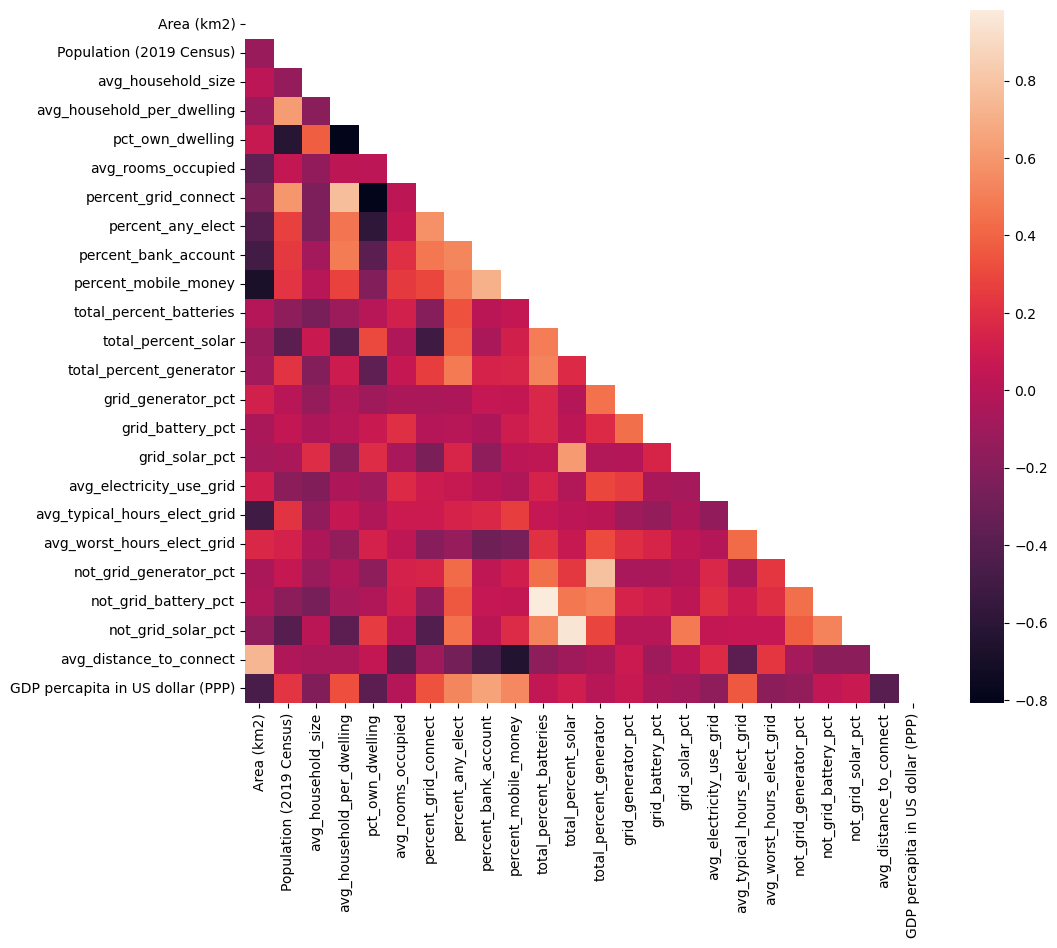

In [58]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, mask=mask)
fig.savefig("corr_matrix.png")

In [27]:
corr_matrix_target = corr_matrix.iloc[:,len(corr_matrix)-1]
corr_matrix_target = pd.DataFrame(corr_matrix_target).reset_index()
corr_matrix_target = corr_matrix_target.rename(columns={"index":"variable","GDP percapita in US dollar (PPP)":"target"})
corr_matrix_target

,variable,target
0,Area (km2),-0.463899
1,Population (2019 Census),0.222324
2,avg_household_size,-0.224009
3,avg_household_per_dwelling,0.320192
4,pct_own_dwelling,-0.375702
5,avg_rooms_occupied,-0.013852
6,percent_grid_connect,0.333595
7,percent_any_elect,0.528528
8,percent_bank_account,0.650348
9,percent_mobile_money,0.541975


In [28]:
new_corr_matrix_target = corr_matrix_target[(corr_matrix_target['target']>0.2) | (corr_matrix_target['target']<-0.2)].iloc[:-1]
new_corr_matrix_target

,variable,target
0,Area (km2),-0.463899
1,Population (2019 Census),0.222324
2,avg_household_size,-0.224009
3,avg_household_per_dwelling,0.320192
4,pct_own_dwelling,-0.375702
6,percent_grid_connect,0.333595
7,percent_any_elect,0.528528
8,percent_bank_account,0.650348
9,percent_mobile_money,0.541975
17,avg_typical_hours_elect_grid,0.357840


In [55]:
new_corr_matrix_target.sort_values(by=["target"],ascending=False)

,variable,target
8,percent_bank_account,0.650348
9,percent_mobile_money,0.541975
7,percent_any_elect,0.528528
17,avg_typical_hours_elect_grid,0.357840
6,percent_grid_connect,0.333595
3,avg_household_per_dwelling,0.320192
1,Population (2019 Census),0.222324
2,avg_household_size,-0.224009
4,pct_own_dwelling,-0.375702
22,avg_distance_to_connect,-0.397018


# Explanation

* In relation to the GDP per capita for all the counties we found that the variables have the most correlation. The percent_bank_account has the highest correlation with the GDP per capita as would be expected.
* The data reveals that in counties where indviduals have more saving or access to bank account, then the gdp per capita is higher which in turn means they have relatively higher access to electricity. 
* On the other hand the population of a specfic county is less significant for the per capital income perse.
* Aside the access to bank account, the access to electricity (in terms of % grid connection, % electricity coverage and average typical hours of operation of the grid) plays a major role in raising the GDP per capita.
* The land mass does seem to have an effect on the GDP per capita i.e., smaller regions will likely have higher GDP per capita

In [29]:
variables = new_corr_matrix_target["variable"].to_list()
variables

['Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'percent_grid_connect',
 'percent_any_elect',
 'percent_bank_account',
 'percent_mobile_money',
 'avg_typical_hours_elect_grid',
 'avg_distance_to_connect']

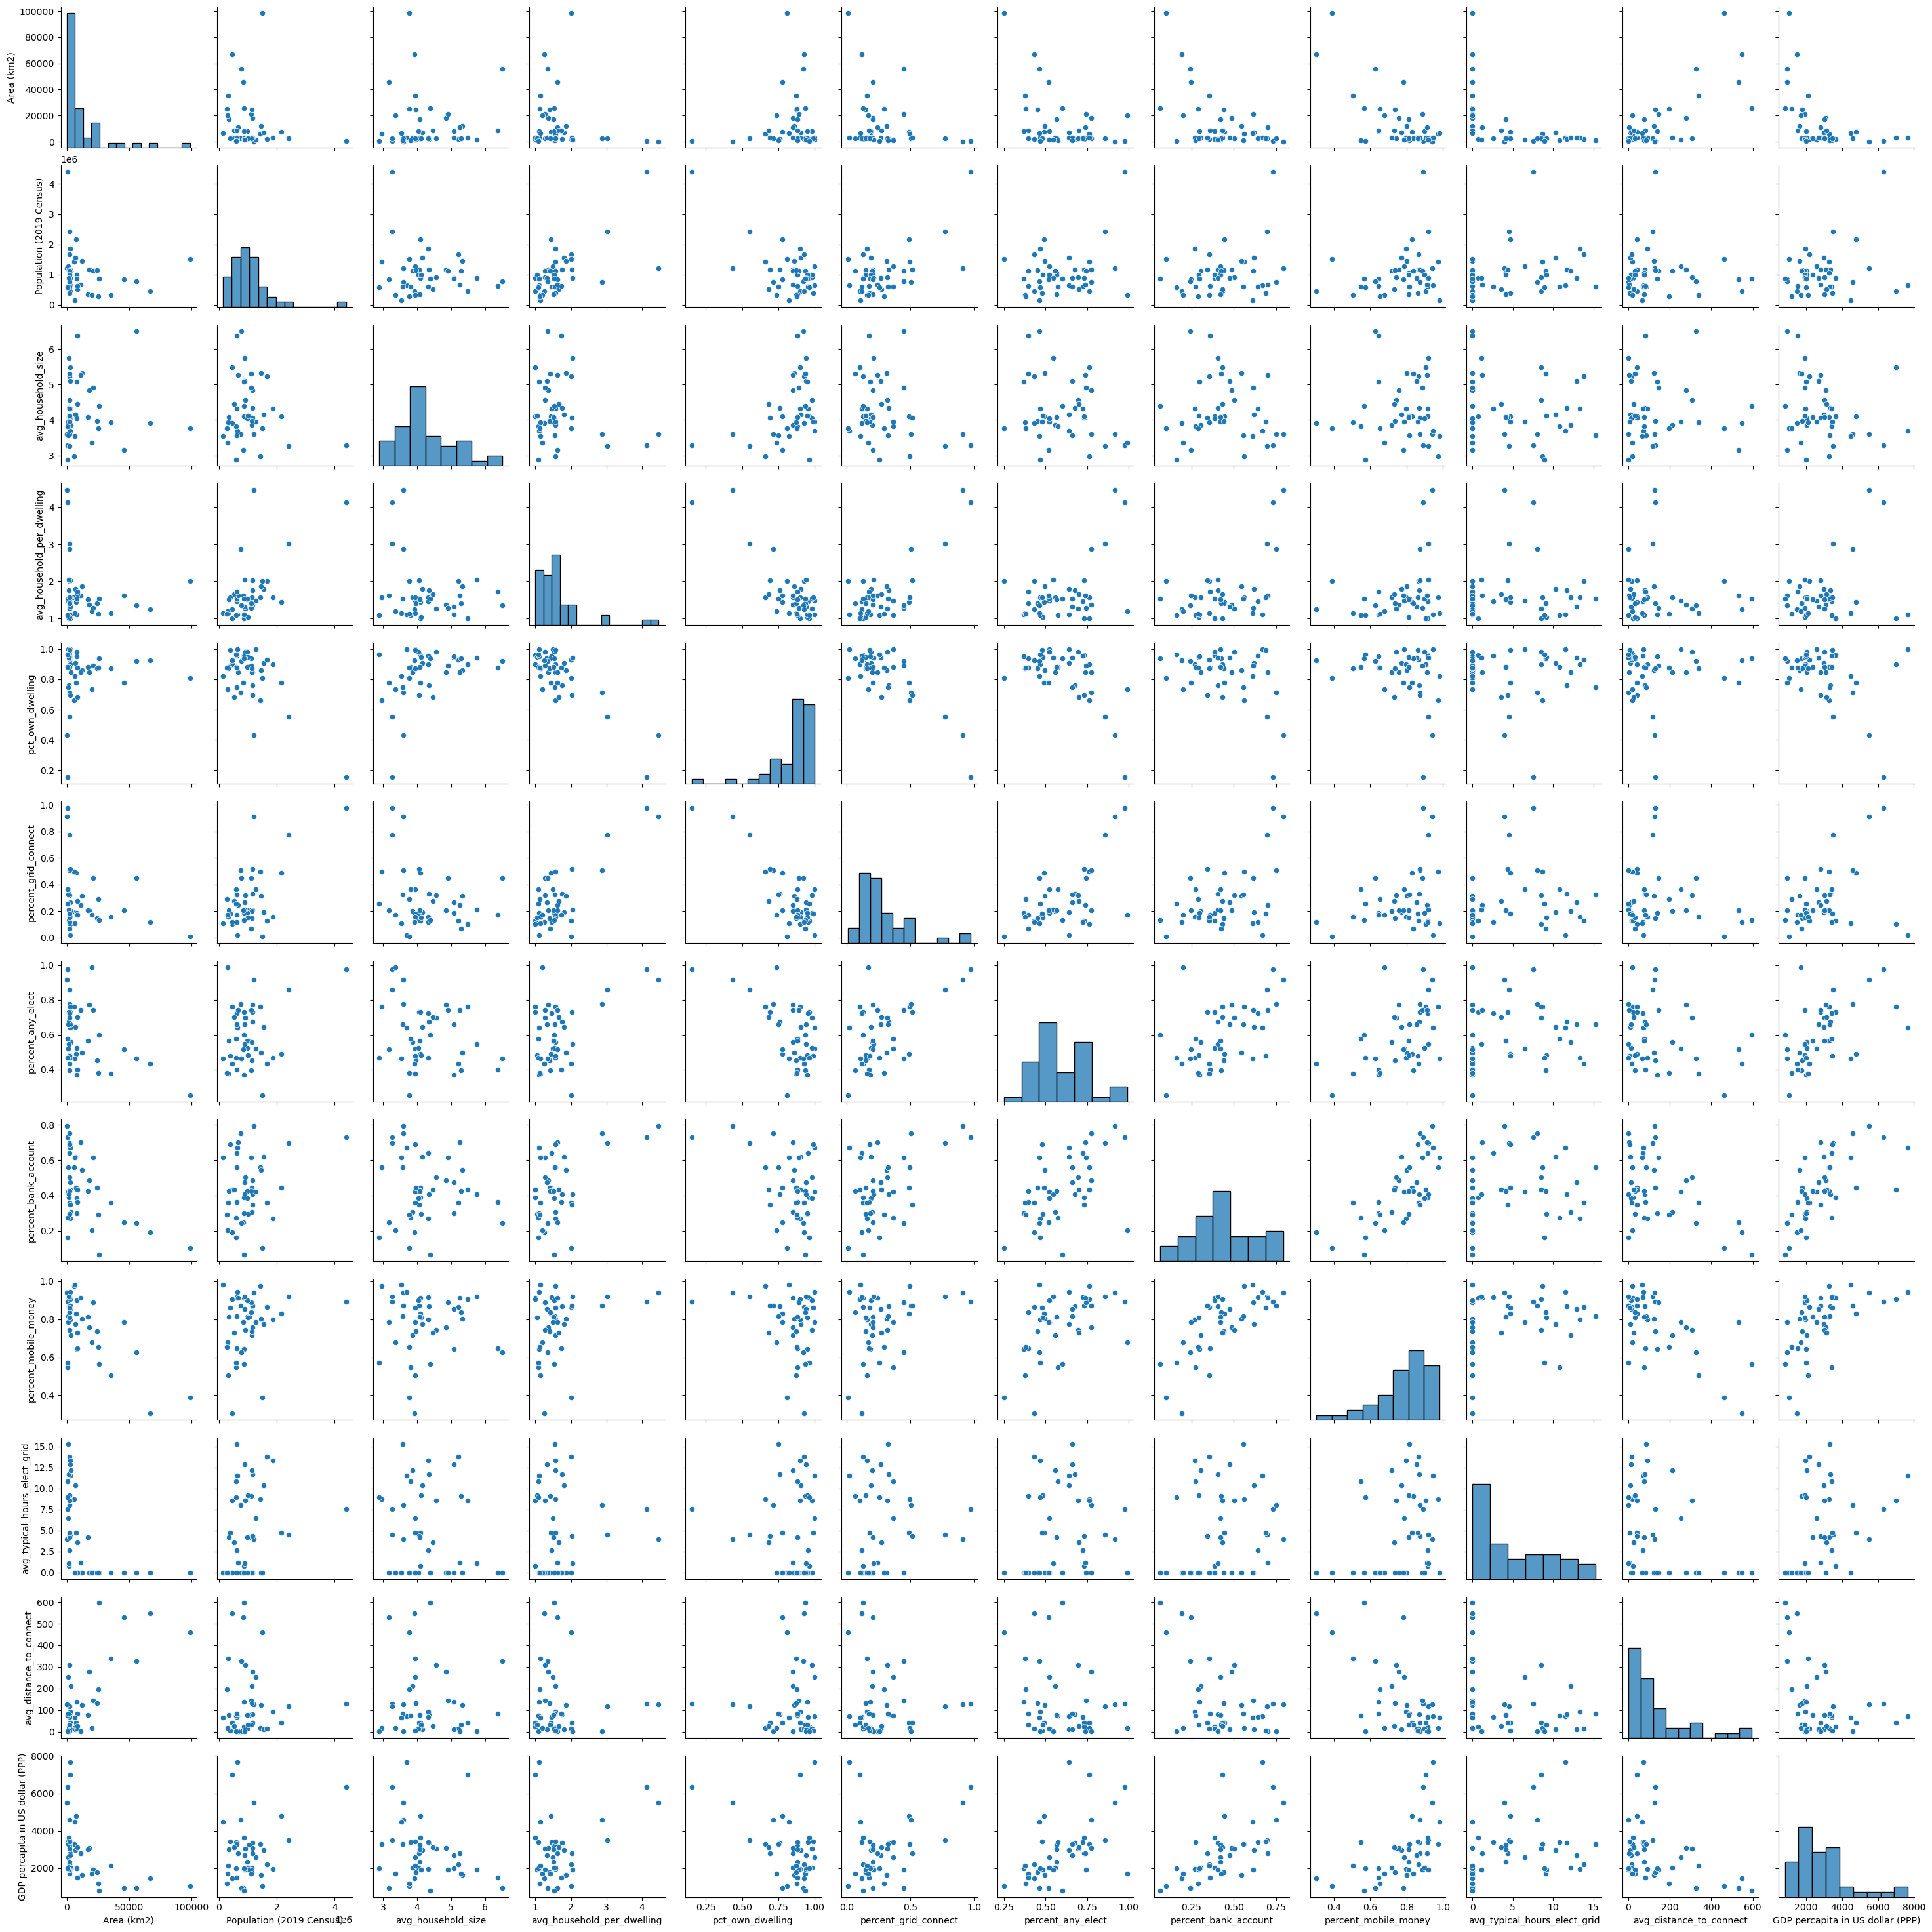

In [31]:
plot_data = new_gdp_food_household_merge_no_county[variables + ['GDP percapita in US dollar (PPP)']]

sns.pairplot(plot_data)
plt.show()

In [36]:
new_gdp_food_household_merge_no_county

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,percent_mobile_money,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,694.9,4397073.0,3.277667,4.133462,0.151407,2.550039,0.976455,0.976455,0.730640,0.891949,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,7509.5,2162202.0,4.090853,1.434576,0.778588,2.946162,0.488532,0.488532,0.444422,0.829839,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,2449.2,2417735.0,3.271330,3.019257,0.553244,2.512048,0.772467,0.857932,0.697012,0.919023,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,212.5,1208333.0,3.597864,4.465478,0.432261,3.095794,0.914691,0.914691,0.793289,0.940593,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.640673,0.670830,0.943559,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,5952.9,1421932.0,2.969221,1.568087,0.660238,3.209653,0.494651,0.761535,0.559860,0.973407,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,7003.1,1545714.0,4.159943,1.801596,0.905310,3.255423,0.192156,0.641852,0.618303,0.772813,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,2009.5,1155574.0,4.346498,1.755546,0.759504,2.489644,0.330533,0.673750,0.407726,0.867440,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,2206.9,1670570.0,5.221469,2.014724,0.927769,2.865198,0.127269,0.430421,0.357495,0.864957,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,3033.8,1867579.0,4.326580,1.572236,0.897832,2.826135,0.157134,0.466664,0.270204,0.796954,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [44]:
full_data_with_county = new_gdp_food_household_merge_no_county.copy()
full_data_with_county

,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,percent_mobile_money,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,694.9,4397073.0,3.277667,4.133462,0.151407,2.550039,0.976455,0.976455,0.730640,0.891949,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,7509.5,2162202.0,4.090853,1.434576,0.778588,2.946162,0.488532,0.488532,0.444422,0.829839,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,2449.2,2417735.0,3.271330,3.019257,0.553244,2.512048,0.772467,0.857932,0.697012,0.919023,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,212.5,1208333.0,3.597864,4.465478,0.432261,3.095794,0.914691,0.914691,0.793289,0.940593,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.640673,0.670830,0.943559,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,5952.9,1421932.0,2.969221,1.568087,0.660238,3.209653,0.494651,0.761535,0.559860,0.973407,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,7003.1,1545714.0,4.159943,1.801596,0.905310,3.255423,0.192156,0.641852,0.618303,0.772813,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,2009.5,1155574.0,4.346498,1.755546,0.759504,2.489644,0.330533,0.673750,0.407726,0.867440,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,2206.9,1670570.0,5.221469,2.014724,0.927769,2.865198,0.127269,0.430421,0.357495,0.864957,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,3033.8,1867579.0,4.326580,1.572236,0.897832,2.826135,0.157134,0.466664,0.270204,0.796954,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [46]:
county = pd.DataFrame(new_gdp_food_household_merge["County"])
county

,County
0,nairobi
1,nakuru
2,kiambu
3,mombasa
4,nyandarua
5,machakos
6,meru
7,kisumu
8,bungoma
9,kakamega


In [47]:
full_data_with_county = pd.concat([county,full_data_with_county], axis=1)
full_data_with_county

,County,Area (km2),Population (2019 Census),avg_household_size,avg_household_per_dwelling,pct_own_dwelling,avg_rooms_occupied,percent_grid_connect,percent_any_elect,percent_bank_account,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,694.9,4397073.0,3.277667,4.133462,0.151407,2.550039,0.976455,0.976455,0.730640,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,7509.5,2162202.0,4.090853,1.434576,0.778588,2.946162,0.488532,0.488532,0.444422,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,kiambu,2449.2,2417735.0,3.271330,3.019257,0.553244,2.512048,0.772467,0.857932,0.697012,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,mombasa,212.5,1208333.0,3.597864,4.465478,0.432261,3.095794,0.914691,0.914691,0.793289,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,nyandarua,3107.7,638289.0,3.693020,1.112882,1.000000,2.406718,0.018093,0.640673,0.670830,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,5952.9,1421932.0,2.969221,1.568087,0.660238,3.209653,0.494651,0.761535,0.559860,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,meru,7003.1,1545714.0,4.159943,1.801596,0.905310,3.255423,0.192156,0.641852,0.618303,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,kisumu,2009.5,1155574.0,4.346498,1.755546,0.759504,2.489644,0.330533,0.673750,0.407726,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,bungoma,2206.9,1670570.0,5.221469,2.014724,0.927769,2.865198,0.127269,0.430421,0.357495,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,kakamega,3033.8,1867579.0,4.326580,1.572236,0.897832,2.826135,0.157134,0.466664,0.270204,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [48]:
full_data_with_county.columns.to_list()

['County',
 'Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'avg_rooms_occupied',
 'percent_grid_connect',
 'percent_any_elect',
 'percent_bank_account',
 'percent_mobile_money',
 'total_percent_batteries',
 'total_percent_solar',
 'total_percent_generator',
 'grid_generator_pct',
 'grid_battery_pct',
 'grid_solar_pct',
 'avg_electricity_use_grid',
 'avg_typical_hours_elect_grid',
 'avg_worst_hours_elect_grid',
 'not_grid_generator_pct',
 'not_grid_battery_pct',
 'not_grid_solar_pct',
 'avg_distance_to_connect',
 'GDP percapita in US dollar (PPP)']

In [49]:
full_data_with_county.to_csv("new_gdp_food_household_merge_no_county2.csv",index=False)